In [91]:
import pandas as pd
import numpy as np
from K_Means_Clustering import K_Means_Clustering
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist

In [92]:
# read dataset
df = pd.read_csv("data/credit_card_customer_data.csv")

In [93]:
# show head
df.head()

,Unnamed: 0,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1,87073,100000,2,1,1,0
1,1,2,38414,50000,3,0,10,9
2,2,3,17341,50000,7,1,3,4
3,3,4,40496,30000,5,1,1,4
4,4,5,47437,100000,6,0,12,3


In [94]:
# extract five rightmost columns
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
        'Total_visits_online', 'Total_calls_made']

subset = df[cols]

In [95]:
subset.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [96]:
# transform data
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)

# turn into dataframe
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

# Data Visualizations

/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

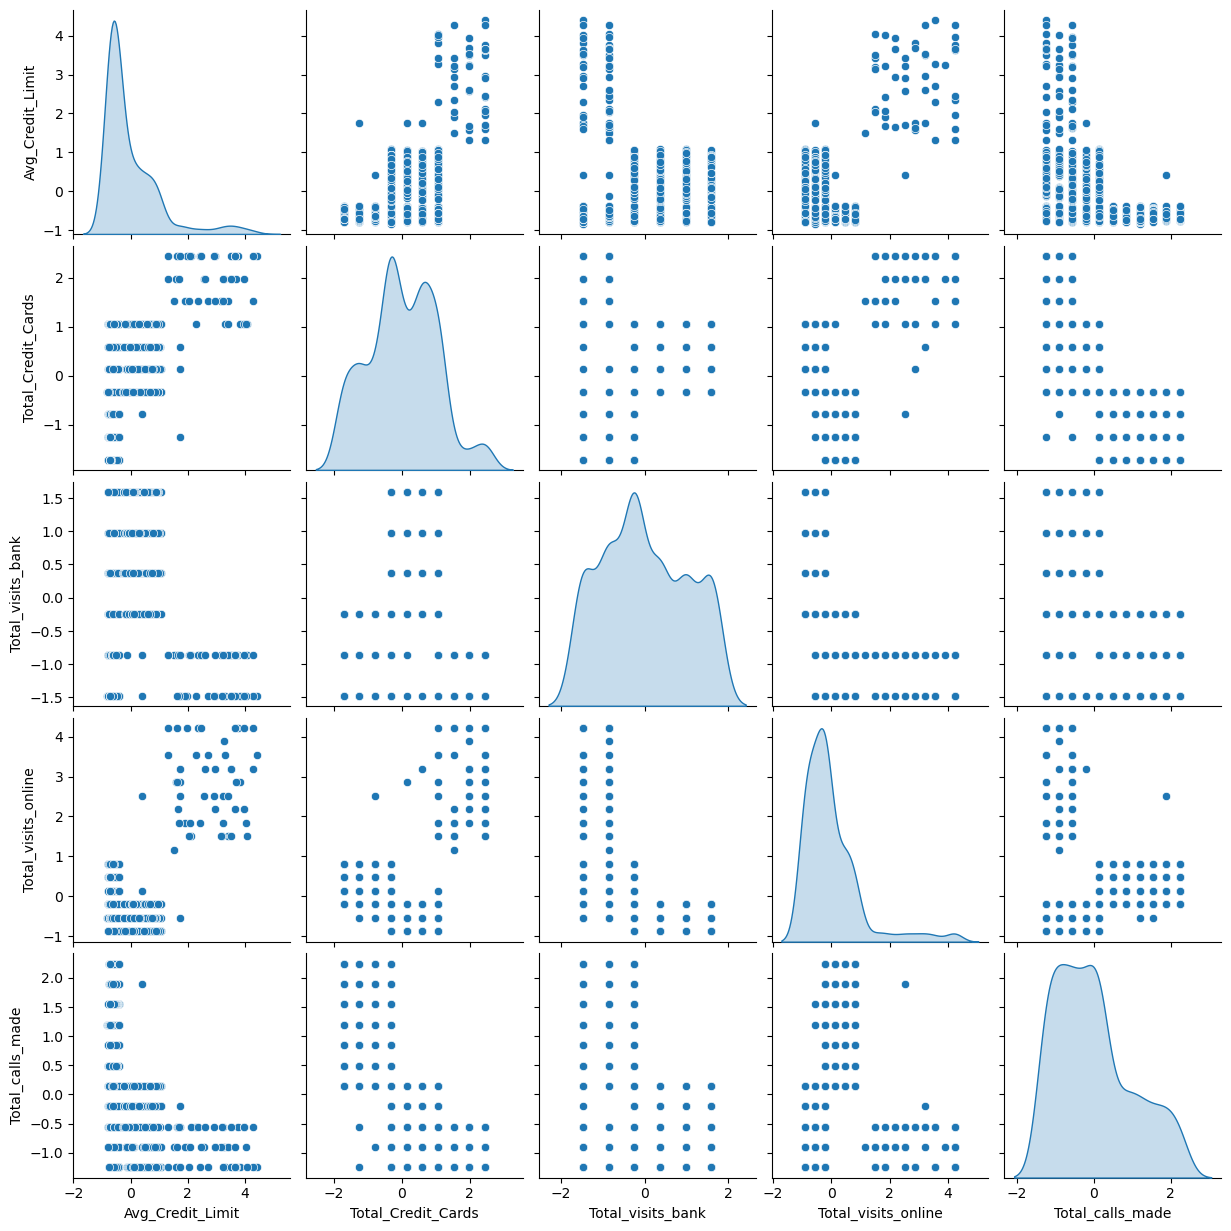

In [97]:
sns.pairplot(subset_scaled_df, diag_kind="kde")

<Axes: >

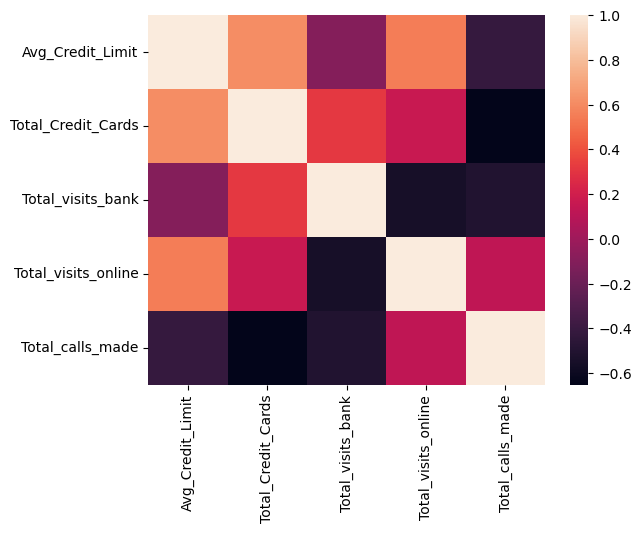

In [98]:
sns.heatmap(subset_scaled_df.corr())

# K Means Clustering

Create elbow plot to determine clusters

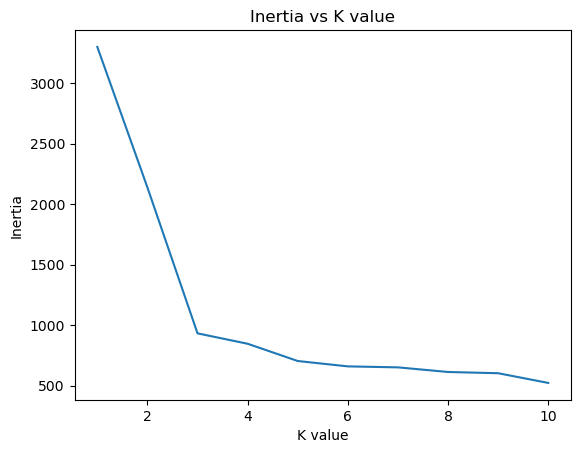

In [99]:
# Create an empty list to store the inertia values
inertias = []

# Define the range of K values to try
k_values = range(1, 11)  # trying K from 1 to 10

# Iterate over each K value
for k in k_values:
    # Initialize and fit the KMeans model
    kmeans = K_Means_Clustering(n_clusters=k)
    kmeans.fit(subset_scaled)
    
    # Calculate inertia (sum of squared distances) for the current K
    inertia = 0
    for i in range(k):
        cluster_points = subset_scaled[kmeans.assign_clusters(subset_scaled) == i]
        centroid = kmeans.centroids[i]
        inertia += np.sum((cluster_points - centroid) ** 2)

    inertias.append(inertia)

# Plotting the elbow plot
fig, ax = plt.subplots()

# Plot k_values on the x axis and inertias on the y axis as a line graph
ax.plot(k_values, inertias)

# Set the title, x label, and y label of the graph
ax.set_title('Inertia vs K value')
ax.set_xlabel('K value')
ax.set_ylabel('Inertia')

# Show the graph
plt.show()

We will use 3 clusters

In [100]:
kmeans = K_Means_Clustering(n_clusters=3)
kmeans.fit(subset_scaled)

In [102]:
centroids = kmeans.centroids
centroids = pd.DataFrame(centroids)

print(centroids)

          0         1         2         3         4
0  0.316490  0.552348  0.471406 -0.163099 -0.596764
1 -0.606698 -1.020282 -0.790646  0.236834  0.574302
2 -0.582862 -1.061956 -0.999307  0.388349  1.760060
